In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [7]:
# Load the dataset with specified encoding
data = pd.read_csv('IMDb Movies India T2.csv', encoding='latin1')


In [8]:
# Handling non-numeric values in 'Votes' column
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')


In [9]:
# Convert 'Genre' column to lists of genres
data['Genre'] = data['Genre'].str.split(', ')

In [10]:
# Convert non-string values or NaN entries in 'Genre' column to 'Unknown'
data['Genre'] = data['Genre'].apply(lambda x: 'Unknown' if not isinstance(x, list) else x)


In [11]:
# Encoding categorical variables
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(data['Genre']), columns=mlb.classes_, index=data.index)
data = pd.concat([data, genre_encoded], axis=1)
data.drop('Genre', axis=1, inplace=True)


In [12]:
# Extracting numeric values from 'Duration' and converting to float
data['Duration'] = data['Duration'].str.extract(r'(\d+)').astype(float)


In [13]:
# Handling missing values in the 'Duration' column
data['Duration'].fillna(data['Duration'].median(), inplace=True)

In [14]:
# Handling missing values in the 'Rating' column
data['Rating'].fillna(data['Rating'].median(), inplace=True)


In [15]:
# Split data into features and target
X = data.drop(['Name', 'Rating'], axis=1)
y = data['Rating']

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Column Transformer for preprocessing
numeric_features = ['Year', 'Duration', 'Votes']
categorical_features = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


In [18]:
# Models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor())
]


In [19]:
# Train models and evaluate
for name, model in models:
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    full_pipeline.fit(X_train, y_train)
    predictions = full_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} Mean Squared Error: {mse}")


Linear Regression Mean Squared Error: 0.9538092709188152
Random Forest Mean Squared Error: 0.8798498872013875


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
data = pd.read_csv('IMDb Movies India T2.csv', encoding='latin1')


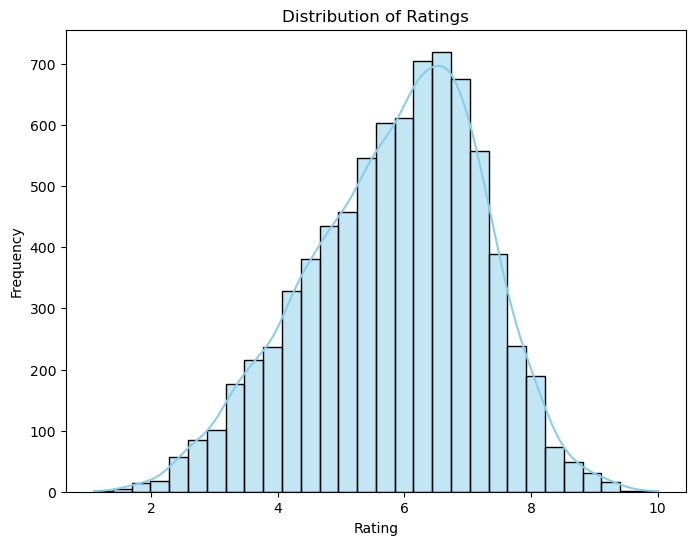

In [26]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


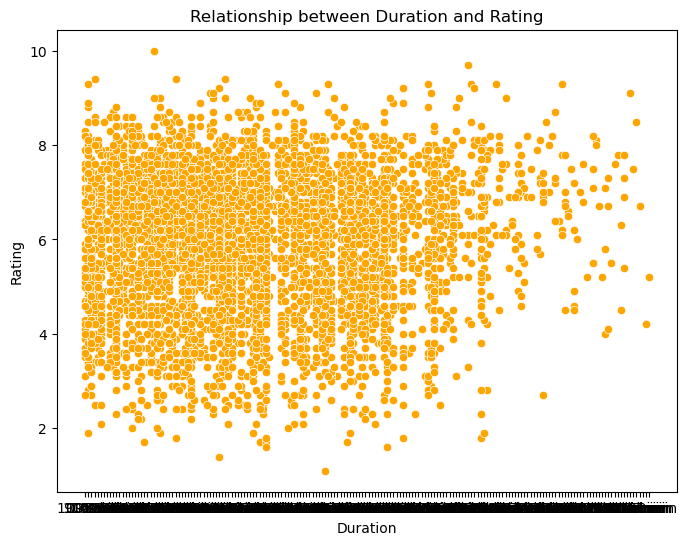

In [27]:
# Relationship between Duration and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Rating', data=data, color='orange')
plt.title('Relationship between Duration and Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()

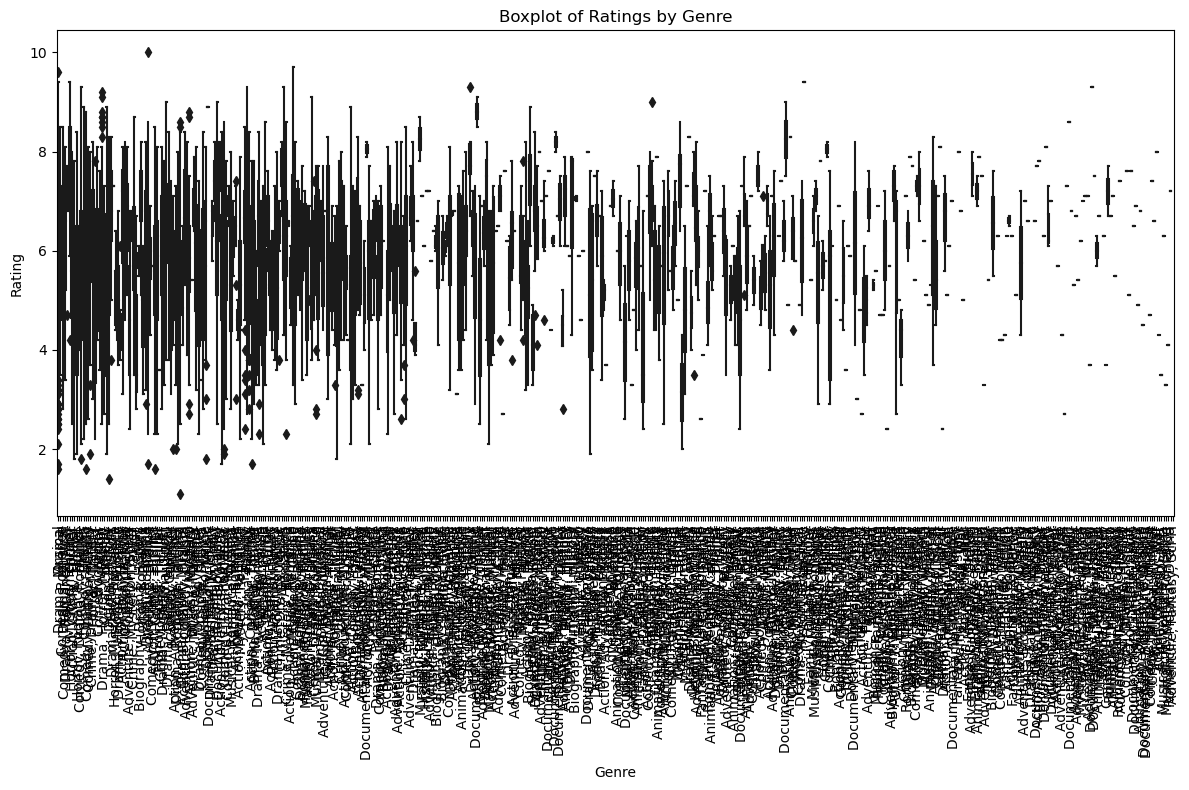

In [28]:
# Boxplot of Ratings by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Rating', data=data, palette='viridis')
plt.title('Boxplot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12092\1544588292.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


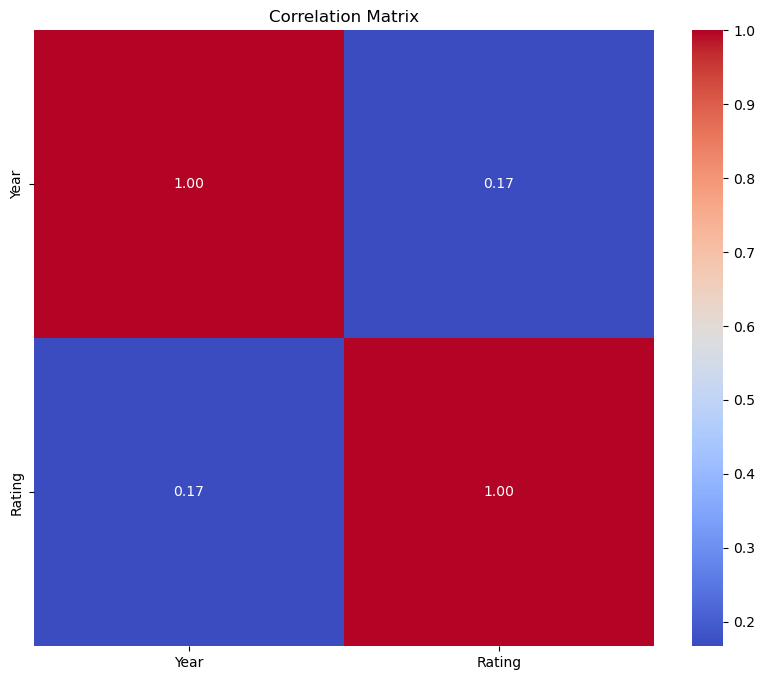

In [29]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

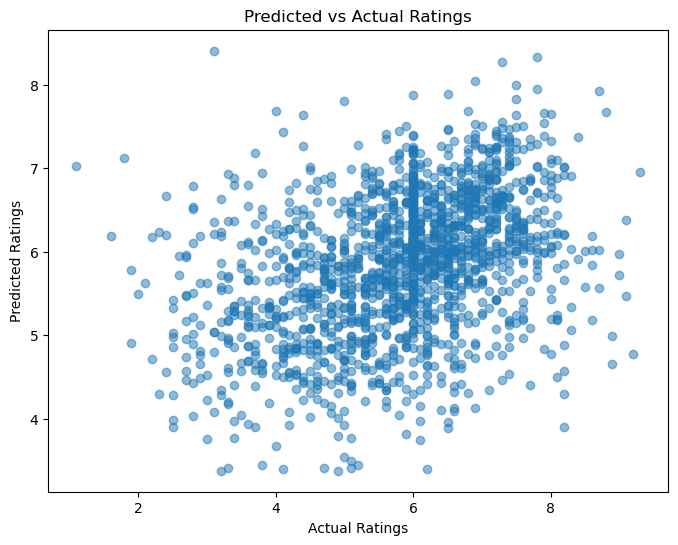

In [30]:
# Scatter plot of predicted vs actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

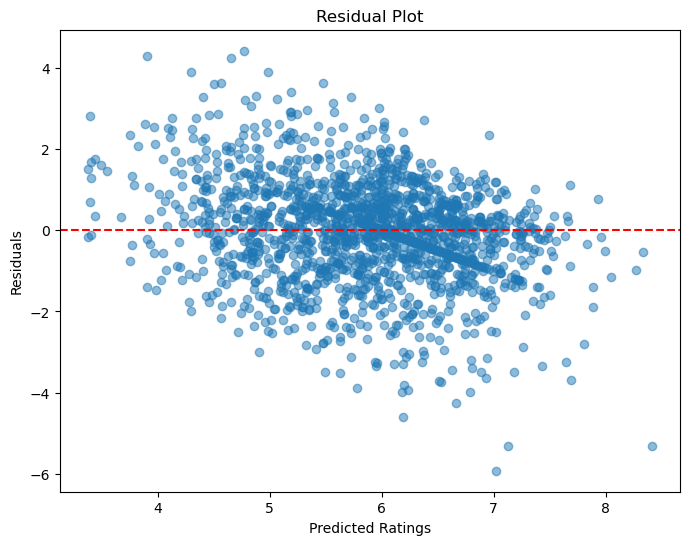

In [31]:
# Residual plot to check for homoscedasticity
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

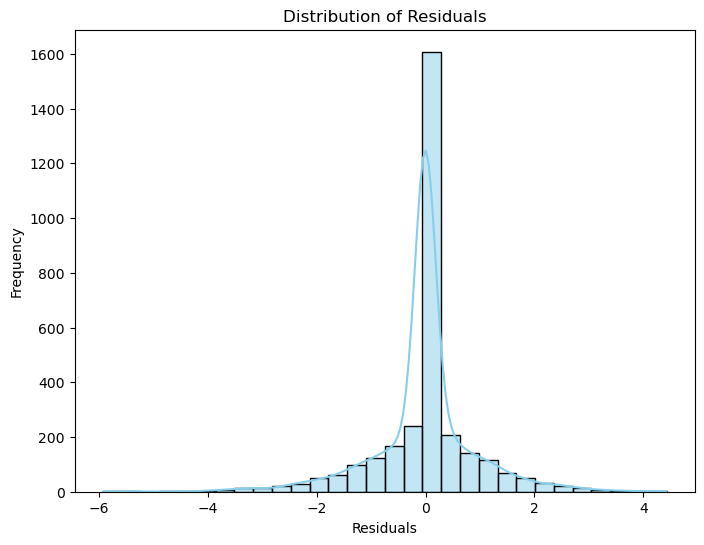

In [32]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


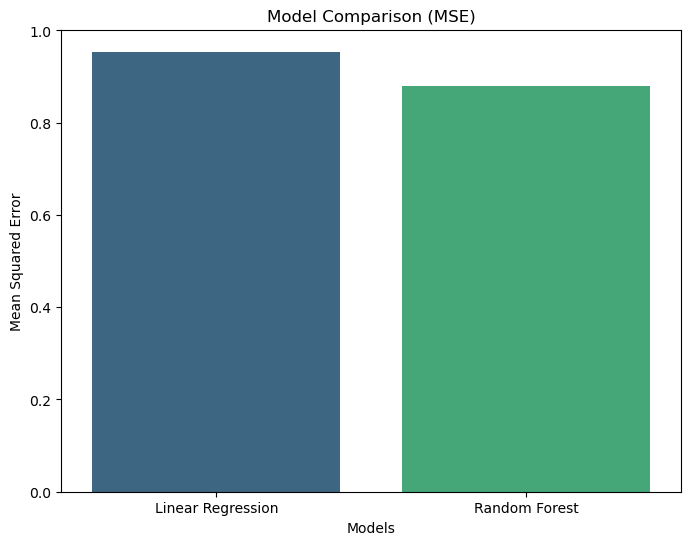

In [35]:
# Display the MSE values
model_names = ['Linear Regression', 'Random Forest']
mse_values = [0.9538092709188152, 0.8798498872013875]  

# Visualize model comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=mse_values, palette='viridis')
plt.title('Model Comparison (MSE)')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()
